# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Analysis of KDE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.integrate import quad

In [2]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2/analysis-kde")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/wuzm/UOEY4S2/nonparam-stats-proj/plots/chap2/analysis-kde'

Example of pathological density and difficulty in using KDE

/var/folders/72/czpkdkzd62bbvhzjzt68qnlw0000gn/T/ipykernel_59912/1756473321.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  normalization_constant, _ = quad(pathological_density, -np.pi, np.pi)


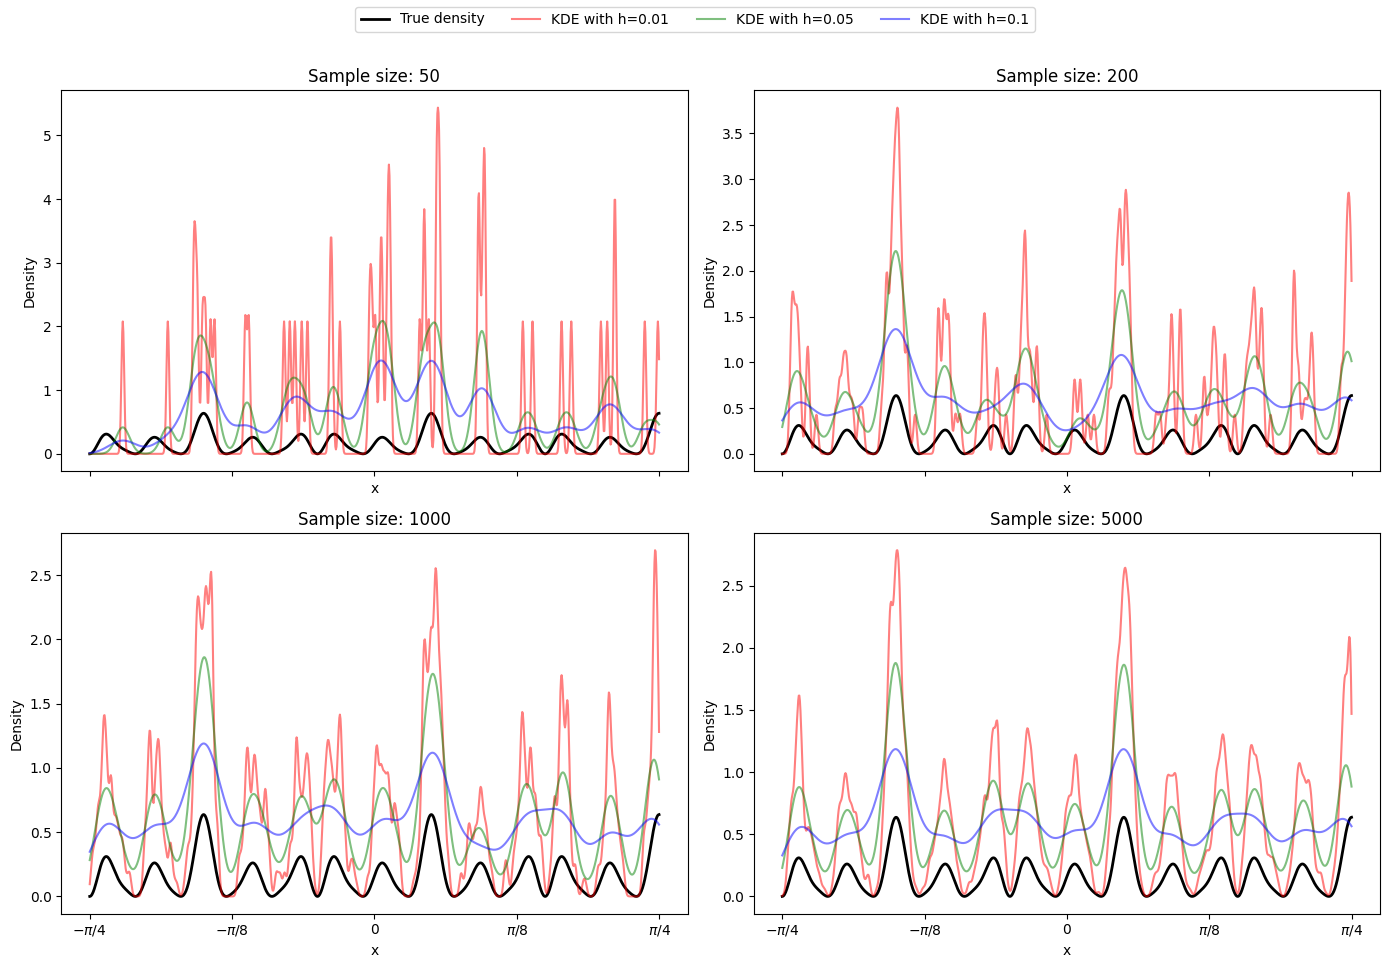

In [9]:
def normalized_pathological_density(x):
    def pathological_density(x):
        return 0.5 * (np.sin(10 * x)**2 + np.cos(20 * x)**2) * (1 + np.sin(50 * x))
    
    normalization_constant, _ = quad(pathological_density, -np.pi, np.pi)
    return pathological_density(x) / normalization_constant

x = np.linspace(-np.pi/4, np.pi/4, 1000)
y = normalized_pathological_density(x)

# sample size
sizes = [50, 200, 1000, 5000]
# bandwidth 
bandwidth_values = [0.01, 0.05, 0.1]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs = axs.flatten()

# Loop through different sizes of data and create KDE for each subplot
for i, size in enumerate(sizes):
    # Generate sample data
    data = np.random.choice(x, size=size, replace=True, p=y/np.sum(y))
    
    # true density 
    axs[i].plot(x, y, label='True density', color='black', linewidth=2)
    
    # Plot KDE for each bandwidth
    for bw, color in zip(bandwidth_values, ['red', 'green', 'blue']):
        kde = gaussian_kde(data, bw_method=bw)
        axs[i].plot(x, kde(x), label=f'KDE with h={bw}', color=color, alpha=0.5)
    
    axs[i].set_title(f'Sample size: {size}')

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('Density')

plt.setp(axs, xticks=[-np.pi/4, -np.pi/8, 0, np.pi/8, np.pi/4],
         xticklabels=['$-\pi/4$', '$-\pi/8$', '0', '$\pi/8$', '$\pi/4$'])

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(os.path.join(plots_folder, 'pathological-density.png'))
plt.show()
